In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import contextlib2
import pandas as pd
import numpy as np
import os
import pickle
from matplotlib import pyplot as plt
from PIL import Image

from utils import label_map_util

from utils import visualization_utils as vis_util
# This is needed to display the images.
%matplotlib inline

In [3]:
# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('/root/models/research/object_detection/data', 'oid_bbox_trainable_label_map_add2.pbtxt')
NUM_CLASSES = 547

label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

In [119]:
name_to_index = {}
for index, value in category_index.items():
    name_to_index[value['name']] = index

In [64]:
def read_frames_todict(input_dir):
# input_dir = '/root/video_inference/od_infrence_1252812627'
    od_dict = {}
    for folder in sorted(os.listdir(input_dir)):
        input_file = os.path.join(input_dir, folder)
        with open(input_file, 'rb') as handle:
            output_dict = pickle.load(handle)
        od_dict[folder] = output_dict
    return od_dict

def calculate_words(od_dict, NUM_CLASSES, maxF_dict):
    class_counts = { idx+1:0 for idx in range(NUM_CLASSES)}
    for key, frame in od_dict.items():
        for c, prob in zip(frame['detection_classes'], frame['detection_scores']):
            if prob > maxF_dict[c]['Threshold']:
                class_counts[c] += 1
    return class_counts

def plot_class(od_dir, results, NUM_CLASSES, topN=5, out_path='',meanword=''):
#     results[od_dir]['Words']
    total_cnt = 0
#     for cnt in results[od_dir]['Words'].values():
#         total_cnt += cnt
    total_cnt = sum(results[od_dir]['Words'].values())
    xx = [x+1 for x in range(NUM_CLASSES)]
    yy = [results[od_dir]['Words'][x+1]*100.0/total_cnt   for x in range(NUM_CLASSES)  ]
    plt.xlim(0, 547);
    # plt.ylim(0, 1.0);
    plt.plot(xx, yy, 'ob');
    print_topN(od_dir, results, topN, meanword=meanword)
    if out_path:
        plt.savefig(out_path, transparent=False, dpi = 300)
        
def print_topN(od_dir, results, topN=5,meanword=''):
    wordsFreqDict=results[od_dir]['Words']
    # Create a list of tuples sorted by index 1 i.e. value field     
    listofTuples = sorted(wordsFreqDict.items() ,  key=lambda x: x[1], reverse=True)
    # Iterate over the sorted sequence
    total_cnt = sum(results[od_dir]['Words'].values())
#     print('ID', 'frequency', 'Name' )
    if len(meanword)>0:
        print("{0},{1},{2},{3}".format('ID', 'frequency (%)', 'Name','% of All' ))
        for elem in listofTuples[0:topN] :
            print("{0},{1:0.2f},{2},{3:0.2f}".format(elem[0] , elem[1]*100.0/total_cnt, category_index[elem[0]]['name'],elem[1]*100.0/meanword[elem[0]-1]))



    else:
        print("{0},{1},{2}".format('ID', 'frequency (%)', 'Name' ))
        for elem in listofTuples[0:topN] :
    #         print(elem[0] , elem[1]*100.0/total_cnt, category_index[elem[0]]['name'] )
            print("{0},{1:0.2f},{2}".format(elem[0] , elem[1]*100.0/total_cnt, category_index[elem[0]]['name']))



def calculate_words(od_dict, NUM_CLASSES, maxF_dict):
    class_counts = { idx+1:0 for idx in range(NUM_CLASSES)}
    for key, frame in od_dict.items():
        try: 
            for c, prob in zip(frame['detection_classes'], frame['detection_scores']):
                if prob > maxF_dict[c]['Threshold']:
                    class_counts[c] += 1
#                 if key == 'image-000649.pickle':
#                     print(c,prob, key, frame)
        except:
            print(key, frame,'error')
#             break
    return class_counts



In [5]:
video_csv='/root/ampvideo_list/vidoe_list_drop_per2.csv'
video_list = pd.read_csv(video_csv)

In [6]:
video_id_list = video_list['VIDEO_ID'].to_list()
print(len(video_id_list))

5659


In [8]:
video_csv='/root/ampvideo/_SELECT2_add_more.csv'
video_2_list = pd.read_csv(video_csv)
print(len(video_2_list))

169


In [10]:
video_id_2_list = video_2_list['VIDEO_ID'].to_list()
print(len(video_id_2_list))

169


In [25]:
df = video_list
result_to_showName = {}
videoID_to_showName = {}
for index, row in df.iterrows():
#     print(row['SHOW_NAME'], row['VIDEO_ID'])
    videoID_to_showName[row['VIDEO_ID']] = row['SHOW_NAME']
    video_id = row['VIDEO_ID']
    folder = 'od_'+ str(video_id)[1:10] +'_1fps'
    result_to_showName[folder] = row['SHOW_NAME']
    

In [26]:
df = video_2_list
# result_to_showName = {}
# videoID_to_showName = {}
for index, row in df.iterrows():
#     print(row['SHOW_NAME'], row['VIDEO_ID'])
    videoID_to_showName[row['VIDEO_ID']] = row['SHOW_NAME']
    video_id = row['VIDEO_ID']
    folder = 'od_'+ str(video_id)[0:10] +'_1fps'
    result_to_showName[folder] = row['SHOW_NAME']
    

In [14]:
with open('/root/openimage/f_score_v5.pickle', 'rb') as handle:
    maxF_dict = pickle.load(handle)

In [18]:
model_dir = "/root/ampvideo_list/models/model2053v1"
results = pickle.load( open( os.path.join(model_dir, "results.pickle"), "rb" ) )

# pickle.load( results, open( os.path.join(model_dir, "results.pickle"), "wb" ) )



In [24]:
# input_dir = '/root/root/ampvideo_inference/'
input_dir = '/root/ampvideo_inference/'

os.listdir(input_dir)

# os.path.exists(os.path.join(input_dir, 'od_483363986_1fps')) 
# os.listdir(os.path.join(input_dir, 'od_483363986_1fps'))
error = []
# results = {}
for idx, video_id in enumerate(video_id_2_list):
    folder = 'od_'+ str(video_id)[0:10] +'_1fps'
    folder_dir = os.path.join(input_dir, folder)
    
    if folder in results: 
        continue
    print("{} , idx: {}".format(folder_dir, idx))
    if os.path.exists(folder_dir):
        
        if len(os.listdir(folder_dir)) > 20:
            # read pickle
            results[folder] = {}
            results[folder]['Words'] = calculate_words(read_frames_todict(folder_dir), NUM_CLASSES, maxF_dict)
#             results[folder]['Raw'] = read_frames_todict(folder_dir)
#             results[folder]['Words'] = calculate_words(results[folder]['Raw'], NUM_CLASSES, maxF_dict)
            
        else:
            # show error
            print("error:"+ folder)
            error.append(folder)
            
    

/root/ampvideo_inference/od_3497728692_1fps , idx: 0
/root/ampvideo_inference/od_3497720488_1fps , idx: 1
/root/ampvideo_inference/od_3497725546_1fps , idx: 2
/root/ampvideo_inference/od_3497727739_1fps , idx: 3
/root/ampvideo_inference/od_3497730133_1fps , idx: 4
/root/ampvideo_inference/od_3497715186_1fps , idx: 5
/root/ampvideo_inference/od_3497684122_1fps , idx: 6
/root/ampvideo_inference/od_3497686681_1fps , idx: 7
/root/ampvideo_inference/od_3497721534_1fps , idx: 8
/root/ampvideo_inference/od_3497710540_1fps , idx: 9
/root/ampvideo_inference/od_3497727075_1fps , idx: 10
/root/ampvideo_inference/od_3497686147_1fps , idx: 11
/root/ampvideo_inference/od_3497709338_1fps , idx: 12
/root/ampvideo_inference/od_3497703065_1fps , idx: 13
/root/ampvideo_inference/od_3497717047_1fps , idx: 14
/root/ampvideo_inference/od_3497729227_1fps , idx: 15
/root/ampvideo_inference/od_3497727074_1fps , idx: 16
/root/ampvideo_inference/od_3497706688_1fps , idx: 17
/root/ampvideo_inference/od_3497718464

/root/ampvideo_inference/od_3502428747_1fps , idx: 151
/root/ampvideo_inference/od_3498263771_1fps , idx: 152
/root/ampvideo_inference/od_3448573684_1fps , idx: 153
/root/ampvideo_inference/od_3448531316_1fps , idx: 154
/root/ampvideo_inference/od_3423587787_1fps , idx: 155
/root/ampvideo_inference/od_3423611460_1fps , idx: 156
/root/ampvideo_inference/od_3494295582_1fps , idx: 157
/root/ampvideo_inference/od_3487029989_1fps , idx: 158
/root/ampvideo_inference/od_3461898314_1fps , idx: 159
/root/ampvideo_inference/od_3423382124_1fps , idx: 160
/root/ampvideo_inference/od_3506731463_1fps , idx: 161
/root/ampvideo_inference/od_3423503799_1fps , idx: 162
/root/ampvideo_inference/od_3423604532_1fps , idx: 163
/root/ampvideo_inference/od_3491374901_1fps , idx: 164
/root/ampvideo_inference/od_3423606816_1fps , idx: 165
/root/ampvideo_inference/od_3423615333_1fps , idx: 166
/root/ampvideo_inference/od_3506798654_1fps , idx: 167
/root/ampvideo_inference/od_3423611860_1fps , idx: 168


547
ID,frequency (%),Name,% of All


IndexError: string index out of range

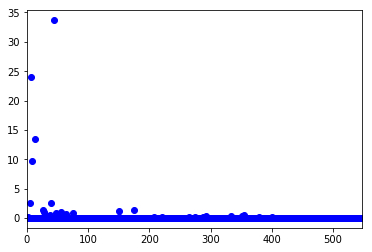

In [57]:
od_dir = "od_3438636448_1fps" #africa's wild
plot_class(od_dir, results, NUM_CLASSES,20)

In [ ]:
# Mean all classes counts

def mean_words(od_dict, NUM_CLASSES, maxF_dict):
    class_counts = { idx+1:0 for idx in range(NUM_CLASSES)}
    for key, frame in od_dict.items():
        try: 
            for c, prob in zip(frame['detection_classes'], frame['detection_scores']):
                if prob > maxF_dict[c]['Threshold']:
                    class_counts[c] += 1
#                 if key == 'image-000649.pickle':
#                     print(c,prob, key, frame)
        except:
            print(key, frame,'error')
#             break
    return class_counts

def plot_class(od_dir, results, NUM_CLASSES, topN=5, out_path=''):
#     results[od_dir]['Words']
    total_cnt = 0
#     for cnt in results[od_dir]['Words'].values():
#         total_cnt += cnt
    total_cnt = sum(results[od_dir]['Words'].values())

In [28]:
od_dir = "od_3438636448_1fps" #africa's wild
np.array(list(results[od_dir]['Words'].values()))

# plot_class(od_dir, results, NUM_CLASSES,20)

{1: 12,
 2: 0,
 3: 0,
 4: 0,
 5: 423,
 6: 3959,
 7: 0,
 8: 1604,
 9: 0,
 10: 1,
 11: 0,
 12: 0,
 13: 2198,
 14: 0,
 15: 0,
 16: 1,
 17: 6,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 234,
 28: 168,
 29: 0,
 30: 81,
 31: 48,
 32: 64,
 33: 0,
 34: 0,
 35: 2,
 36: 8,
 37: 77,
 38: 0,
 39: 411,
 40: 0,
 41: 6,
 42: 0,
 43: 0,
 44: 0,
 45: 5536,
 46: 0,
 47: 143,
 48: 0,
 49: 0,
 50: 24,
 51: 0,
 52: 3,
 53: 12,
 54: 0,
 55: 176,
 56: 0,
 57: 0,
 58: 0,
 59: 0,
 60: 0,
 61: 0,
 62: 74,
 63: 0,
 64: 118,
 65: 1,
 66: 1,
 67: 0,
 68: 0,
 69: 0,
 70: 0,
 71: 0,
 72: 0,
 73: 0,
 74: 0,
 75: 0,
 76: 148,
 77: 0,
 78: 0,
 79: 0,
 80: 0,
 81: 0,
 82: 0,
 83: 0,
 84: 0,
 85: 0,
 86: 0,
 87: 0,
 88: 0,
 89: 0,
 90: 0,
 91: 0,
 92: 0,
 93: 0,
 94: 0,
 95: 0,
 96: 0,
 97: 0,
 98: 0,
 99: 0,
 100: 3,
 101: 0,
 102: 0,
 103: 0,
 104: 0,
 105: 0,
 106: 0,
 107: 0,
 108: 0,
 109: 1,
 110: 0,
 111: 0,
 112: 0,
 113: 0,
 114: 0,
 115: 0,
 116: 0,
 117: 0,
 118: 0,
 119: 0,
 

In [49]:
def mean_words(od_dict, NUM_CLASSES):
    class_counts = np.zeros(NUM_CLASSES)
    cnt = 0
    for key, item in od_dict.items():
        try:
#             print(key,item.keys())
            class_counts += np.array(list(item['Words'].values()))
            cnt += 1
    
        
        except:
            print(key,item.keys())
            del od_dict[key]

    return class_counts/cnt , cnt

mean_word, count_docs= mean_words(results, NUM_CLASSES)

In [75]:
def read_frames_todict(input_dir):
# input_dir = '/root/video_inference/od_infrence_1252812627'
    od_dict = {}
    for folder in sorted(os.listdir(input_dir)):
        input_file = os.path.join(input_dir, folder)
        with open(input_file, 'rb') as handle:
            output_dict = pickle.load(handle)
        od_dict[folder] = output_dict
    return od_dict


def plot_class(od_dir, results, NUM_CLASSES, topN=5, out_path='',meanword=''):
#     results[od_dir]['Words']
    total_cnt = 0
#     for cnt in results[od_dir]['Words'].values():
#         total_cnt += cnt
    total_cnt = sum(results[od_dir]['Words'].values())
    xx = [x+1 for x in range(NUM_CLASSES)]
    yy = [results[od_dir]['Words'][x+1]*100.0/total_cnt   for x in range(NUM_CLASSES)  ]
    plt.xlim(0, 547);
    # plt.ylim(0, 1.0);
    plt.plot(xx, yy, 'ob');
    print_topN(od_dir, results, topN, meanword=meanword)
    if out_path:
        plt.savefig(out_path, transparent=False, dpi = 300)
        
def print_topN(od_dir, results, topN=5,meanword=''):
    wordsFreqDict=results[od_dir]['Words']
    # Create a list of tuples sorted by index 1 i.e. value field     
    listofTuples = sorted(wordsFreqDict.items() ,  key=lambda x: x[1], reverse=True)
    # Iterate over the sorted sequence
    total_cnt = sum(results[od_dir]['Words'].values())
#     print('ID', 'frequency', 'Name' )
    if len(meanword)>0:
        print("{0},{1},{2},{3}".format('ID', 'frequency (%)', 'Name','% of All' ))
        for elem in listofTuples[0:topN] :
            print("{0},{1:0.2f},{2},{3:0.2f}".format(elem[0] , elem[1]*100.0/total_cnt, category_index[elem[0]]['name'],elem[1]*100.0/meanword[elem[0]-1]))
        wordsOverallFreqDict = []
        for elem in wordsFreqDict.items():
            wordsOverallFreqDict.append((elem[0],elem[1]*100.0/meanword[elem[0]-1]))
            
        listofoverallTuples = sorted(wordsOverallFreqDict ,  key=lambda x: x[1], reverse=True)
        print("---sort by % among all videos---")
        for elem in listofoverallTuples[0:topN] :
            print("{0},{1:0.3f},{2},{3:0.2f}".format(elem[0] , elem[1]*meanword[elem[0]-1]/total_cnt, category_index[elem[0]]['name'],elem[1]))
      

    else:
        print("{0},{1},{2}".format('ID', 'frequency (%)', 'Name' ))
        for elem in listofTuples[0:topN] :
    #         print(elem[0] , elem[1]*100.0/total_cnt, category_index[elem[0]]['name'] )
            print("{0},{1:0.2f},{2}".format(elem[0] , elem[1]*100.0/total_cnt, category_index[elem[0]]['name']))



def calculate_words(od_dict, NUM_CLASSES, maxF_dict):
    class_counts = { idx+1:0 for idx in range(NUM_CLASSES)}
    for key, frame in od_dict.items():
        try: 
            for c, prob in zip(frame['detection_classes'], frame['detection_scores']):
                if prob > maxF_dict[c]['Threshold']:
                    class_counts[c] += 1
#                 if key == 'image-000649.pickle':
#                     print(c,prob, key, frame)
        except:
            print(key, frame,'error')
#             break
    return class_counts




ID,frequency (%),Name,% of All
45,33.68,Mammal,145.25
6,24.08,Plant,1157.51
13,13.37,Animal,2070.71
8,9.76,Vehicle,102.18
5,2.57,Tree,93.60
39,2.50,Head,7.07
27,1.42,Bird,1565.46
175,1.37,Deer,2869.47
150,1.22,Cattle,2730.85
55,1.07,Nose,6.33
28,1.02,Sports equipment,50.42
76,0.90,Horse,1300.11
47,0.87,Arm,1.80
64,0.72,Mouth,6.62
30,0.49,Dog,792.21
37,0.47,Hair,1.08
62,0.45,Eye,4.19
355,0.45,Cheetah,3579.76
32,0.39,Human body,1.47
352,0.38,Zebra,9822.57
---sort by % among all videos---
264,0.08,Sparrow,41788.41
448,0.01,Bagel,20163.64
352,0.38,Zebra,9822.57
400,0.09,Kangaroo,9267.41
31,0.29,Carnivore,7765.43
396,0.04,Alpaca,5836.84
439,0.01,Raccoon,5545.00
208,0.09,Falcon,4814.26
355,0.45,Cheetah,3579.76
379,0.15,Mule,3224.23
411,0.04,Ostrich,2880.52
175,1.37,Deer,2869.47
288,0.12,Giraffe,2838.13
397,0.02,Doughnut,2749.59
150,1.22,Cattle,2730.85
13,13.37,Animal,2070.71
274,0.18,Bull,1944.44
221,0.15,Eagle,1850.18
293,0.28,Antelope,1687.81
27,1.42,Bird,1565.46


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars


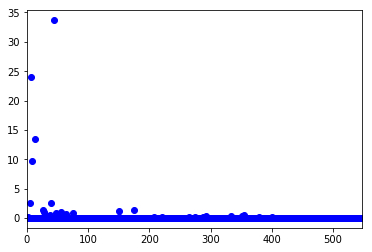

In [72]:
od_dir = "od_3438636448_1fps" #africa's wild
plot_class(od_dir, results, NUM_CLASSES,20,meanword=mean_word)

ID,frequency (%),Name,% of All
47,14.76,Arm,62.39
39,11.26,Head,64.98
37,10.34,Hair,48.60
45,10.20,Mammal,89.76
1,8.75,Person,131.84
32,7.91,Human body,60.84
2,5.92,Clothing,78.33
28,5.10,Sports equipment,512.94
55,4.11,Nose,49.56
64,3.51,Mouth,66.04
62,3.40,Eye,64.51
3,3.02,Man,84.58
4,2.54,Face,62.63
8,1.38,Vehicle,29.49
113,0.77,Ear,114.27
7,0.74,Woman,25.14
6,0.63,Plant,61.98
180,0.62,Football helmet,9341.32
184,0.57,Beard,260.73
96,0.52,Sports uniform,2105.62
---sort by % among all videos---
180,0.62,Football helmet,9341.32
450,0.00,Segway,2310.42
96,0.52,Sports uniform,2105.62
72,0.36,Helmet,1250.96
110,0.01,Bicycle helmet,1193.76
194,0.04,Vase,915.27
325,0.03,Scoreboard,752.63
275,0.01,Headphones,539.13
28,5.10,Sports equipment,512.94
69,0.04,Street light,423.92
499,0.01,Digital clock,411.20
374,0.03,Light bulb,336.80
144,0.01,Traffic sign,284.72
184,0.57,Beard,260.73
67,0.01,Train,249.63
364,0.01,Sombrero,228.03
11,0.51,Footwear,221.41
89,0.01,Ball,219.91
442,0.00,Swim cap,204.

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars


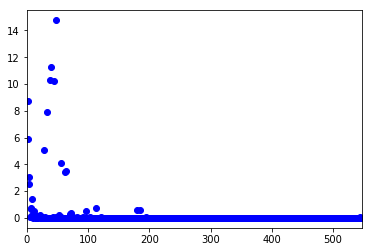

In [73]:
od_dir = "od_3491078546_1fps" #4th & Forever
plot_class(od_dir, results, NUM_CLASSES,20,meanword=mean_word)

ID,frequency (%),Name,% of All
47,14.77,Arm,135.73
45,10.60,Mammal,202.84
39,10.49,Head,131.57
2,9.44,Clothing,271.48
1,8.65,Person,283.23
32,8.40,Human body,140.51
37,8.19,Hair,83.69
3,4.76,Man,289.56
28,3.42,Sports equipment,748.55
4,2.36,Face,126.58
55,2.35,Nose,61.64
8,2.31,Vehicle,107.21
64,1.35,Mouth,55.34
7,1.11,Woman,82.53
5,0.89,Tree,143.17
11,0.88,Footwear,827.70
62,0.87,Eye,35.88
96,0.85,Sports uniform,7496.01
9,0.72,Building,199.62
72,0.66,Helmet,4901.32
---sort by % among all videos---
96,0.855,Sports uniform,7496.01
458,0.007,Rugby ball,6373.56
118,0.008,Football,6189.77
324,0.001,Roller skates,4928.89
72,0.656,Helmet,4901.32
93,0.037,Motorcycle,4158.75
270,0.003,Hamburger,3891.23
280,0.004,Pen,3343.72
535,0.004,Bench,3343.72
425,0.001,Snowplow,3261.76
95,0.080,Shorts,3011.33
317,0.003,Volleyball,2918.42
180,0.086,Football helmet,2843.01
170,0.021,Whiteboard,2238.90
533,0.001,Treadmill,1260.23
94,0.074,Picture frame,1166.00
524,0.003,Dumbbell,1111.78
201,0.001,Baseball gl

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars


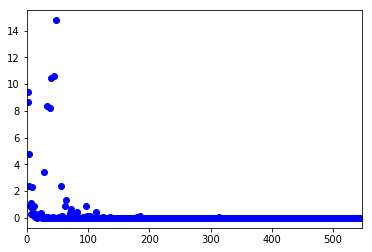

In [76]:
od_dir = "od_3582306776_1fps" #24/7 College 
plot_class(od_dir, results, NUM_CLASSES,20,meanword=mean_word)

In [82]:
input_dir = '/root/root/ampvideo_inference/'
# input_dir = '/root/ampvideo_inference/'
video_id = '3482317008'
folder = 'od_'+ str(video_id)[1:10] +'_1fps'
folder_dir = os.path.join(input_dir, folder)
    
if os.path.exists(folder_dir):

        # read pickle
        print(folder)
        results[folder] = {}
        results[folder]['Words'] = calculate_words(read_frames_todict(folder_dir), NUM_CLASSES, maxF_dict)
#             results[folder]['Raw'] = read_frames_todict(folder_dir)
#             results[folder]['Words'] = calculate_words(results[folder]['Raw'], NUM_CLASSES, maxF_dict)


od_482317008_1fps


ID,frequency (%),Name,% of All
47,15.06,Arm,89.42
45,11.92,Mammal,147.30
8,11.11,Vehicle,333.41
37,8.85,Hair,58.46
39,7.62,Head,61.82
32,6.45,Human body,69.80
1,5.14,Person,108.89
2,3.64,Clothing,67.60
55,3.64,Nose,61.61
5,2.13,Tree,221.73
151,2.10,Marine mammal,10459.07
64,2.08,Mouth,54.83
62,2.06,Eye,54.89
7,1.73,Woman,83.14
304,1.60,Dolphin,42322.66
28,1.54,Sports equipment,218.20
4,1.34,Face,46.26
332,1.21,Whale,14144.27
12,1.14,Girl,130.83
36,0.92,Boat,1918.69
---sort by % among all videos---
304,1.596,Dolphin,42322.66
332,1.212,Whale,14144.27
348,0.265,Shark,12289.45
151,2.097,Marine mammal,10459.07
422,0.081,Rays and skates,4877.55
442,0.049,Swim cap,4714.79
112,0.187,Swimming pool,4237.60
230,0.055,Lifejacket,3550.99
160,0.013,Lighthouse,3360.61
100,0.694,Fish,2619.59
36,0.923,Boat,1918.69
164,0.021,Paddle,1849.87
41,0.823,Watercraft,1509.37
95,0.059,Shorts,1453.75
233,0.004,Bear,1340.18
176,0.028,Surfboard,1261.88
457,0.002,Flute,1239.11
144,0.017,Traffic sign,1138.90
406,0.00

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars


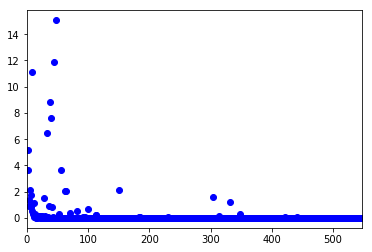

In [83]:
video_id = '3482317008' # Conversations with Dolphins
folder = 'od_'+ str(video_id)[1:10] +'_1fps'
od_dir = folder #Conversations with Dolphins
plot_class(od_dir, results, NUM_CLASSES,20,meanword=mean_word)

ID,frequency (%),Name,% of All
37,16.53,Hair,67.05
47,13.89,Arm,50.63
32,9.76,Human body,64.77
39,9.56,Head,47.57
2,8.74,Clothing,99.75
45,5.71,Mammal,43.32
1,4.86,Person,63.11
7,4.32,Woman,127.21
4,3.51,Face,74.45
3,3.44,Man,82.99
8,2.48,Vehicle,45.74
12,1.38,Girl,97.82
23,1.20,Table,211.82
103,1.05,Couch,866.55
55,0.87,Nose,9.06
62,0.85,Eye,13.86
24,0.83,Glasses,318.42
64,0.75,Mouth,12.17
18,0.74,Furniture,142.27
35,0.60,Drink,458.42
---sort by % among all videos---
431,0.256,Seat belt,2457.43
227,0.142,Sofa bed,1642.07
345,0.097,Loveseat,1635.18
317,0.003,Volleyball,1459.21
106,0.370,Wine glass,1351.28
108,0.225,Wine,1181.53
237,0.059,Pillow,1169.90
514,0.010,Punching bag,994.62
269,0.052,studio couch,897.98
249,0.107,Chest of drawers,872.45
103,1.055,Couch,866.55
447,0.052,Filing cabinet,733.63
83,0.235,Fast food,683.14
140,0.076,Bed,680.37
326,0.017,Jellyfish,657.77
74,0.145,Bottle,622.20
363,0.003,Table tennis racket,594.64
301,0.156,Nightstand,591.12
136,0.367,Bookcase,578.47
86

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars


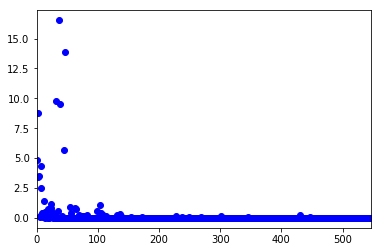

In [87]:
# video_id = '3482317008' # Conversations with Dolphins
# folder = 'od_'+ str(video_id)[1:10] +'_1fps'
od_dir = 'od_3423612893_1fps' #friends 1
plot_class(od_dir, results, NUM_CLASSES,20,meanword=mean_word)

ID,frequency (%),Name,% of All
47,18.91,Arm,59.18
37,12.51,Hair,43.55
32,10.83,Human body,61.74
2,9.20,Clothing,90.09
39,8.96,Head,38.31
1,7.15,Person,79.78
45,6.28,Mammal,40.96
7,3.77,Woman,95.25
4,1.58,Face,28.86
3,1.54,Man,31.98
23,1.41,Table,214.89
155,1.34,Home appliance,1890.94
57,1.16,Tableware,437.98
70,1.15,Hand,153.77
35,1.12,Drink,735.06
55,0.95,Nose,8.45
172,0.85,Kitchen appliance,2759.52
15,0.71,Food,550.76
506,0.71,Blender,33827.38
62,0.66,Eye,9.34
---sort by % among all videos---
455,0.137,Cake stand,147866.67
506,0.709,Blender,33827.38
523,0.225,Food processor,17643.18
498,0.221,Mixer,11379.66
119,0.523,Cake,10469.86
139,0.568,Dairy,10466.47
340,0.246,Cheese,8557.75
486,0.072,Cutting board,8098.17
61,0.624,Baked goods,5576.48
278,0.016,Cookie,5312.57
192,0.072,Bread,3561.46
63,0.439,Dessert,3267.50
370,0.129,Oven,3154.49
329,0.040,Plastic bag,3141.64
454,0.085,Kitchen knife,2762.63
172,0.845,Kitchen appliance,2759.52
502,0.008,Milk,2372.19
209,0.012,Ice cream,2112.38
25

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars


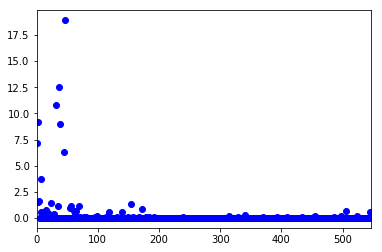

In [88]:
video_id = '3443885092' # America's Test Kitchen
folder = 'od_'+ str(video_id)[1:10] +'_1fps'
od_dir = folder #Conversations with Dolphins
plot_class(od_dir, results, NUM_CLASSES,20,meanword=mean_word)

ID,frequency (%),Name,% of All
47,20.63,Arm,115.78
45,11.05,Mammal,129.14
39,10.01,Head,76.72
37,8.26,Hair,51.57
6,6.31,Plant,821.87
32,6.14,Human body,62.75
55,4.46,Nose,71.50
1,4.11,Person,82.34
2,3.65,Clothing,64.13
5,3.56,Tree,350.96
62,3.02,Eye,76.17
8,2.88,Vehicle,81.60
64,2.79,Mouth,69.69
3,2.75,Man,102.28
4,2.18,Face,71.15
28,1.34,Sports equipment,179.48
70,1.13,Hand,269.91
13,0.95,Animal,398.50
24,0.34,Glasses,200.83
113,0.32,Ear,62.45
---sort by % among all videos---
520,0.002,Chainsaw,8214.81
517,0.016,Wine rack,4777.23
427,0.027,Honeycomb,3919.88
444,0.002,Asparagus,3360.61
310,0.022,Cannon,2818.30
200,0.004,Mushroom,2206.97
202,0.079,Juice,2035.93
343,0.011,Bowling equipment,1922.01
204,0.038,Skull,1603.15
405,0.027,Shotgun,1496.96
372,0.004,Rhinoceros,1369.14
201,0.002,Baseball glove,1081.95
282,0.007,Fork,1062.94
191,0.007,Spider,957.41
170,0.013,Whiteboard,895.56
125,0.022,Helicopter,881.91
6,6.310,Plant,821.87
221,0.020,Eagle,666.07
219,0.018,Glove,665.82
165,0.011,Bro

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars


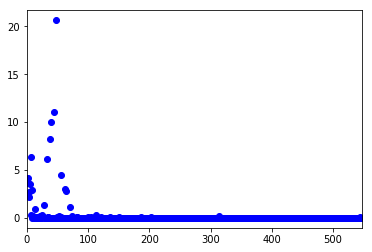

In [89]:
video_id = '3506357403' # Battlefield Detectives: The Civil War: Antietam
folder = 'od_'+ str(video_id)[1:10] +'_1fps'
od_dir = folder #Conversations with Dolphins
plot_class(od_dir, results, NUM_CLASSES,20,meanword=mean_word)

ID,frequency (%),Name,% of All
47,13.39,Arm,60.35
8,11.81,Vehicle,269.01
45,10.54,Mammal,98.89
39,10.04,Head,61.80
37,8.29,Hair,41.59
32,6.84,Human body,56.16
55,4.66,Nose,59.92
1,3.95,Person,63.52
2,2.90,Clothing,40.94
3,2.31,Man,68.97
62,2.15,Eye,43.57
4,2.09,Face,54.78
64,2.08,Mouth,41.71
5,1.91,Tree,150.92
6,1.80,Plant,188.58
28,1.47,Sports equipment,157.27
136,1.35,Bookcase,2641.32
82,1.28,Book,1634.64
41,1.22,Watercraft,1692.21
36,0.88,Boat,1389.39
---sort by % among all videos---
310,0.106,Cannon,10709.53
520,0.003,Chainsaw,8214.81
347,0.008,Mouse,4685.92
136,1.354,Bookcase,2641.32
191,0.022,Spider,2553.09
41,1.217,Watercraft,1692.21
82,1.278,Book,1634.64
481,0.003,Centipede,1529.66
255,0.048,Sheep,1436.97
36,0.881,Boat,1389.39
524,0.006,Dumbbell,1111.78
490,0.006,Drill,1071.50
496,0.020,Harp,1017.43
451,0.006,Ruler,1012.79
387,0.003,Chopsticks,1008.18
168,0.008,Necklace,1006.66
505,0.006,Paper towel,1005.90
220,0.017,Parrot,941.16
143,0.056,Fountain,786.80
515,0.006,Envelope,75

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars


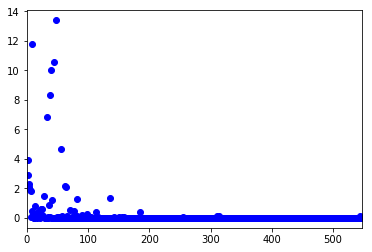

In [90]:
video_id = '3515017121' # Battlefield Detectives, The War of 1812: The Chesapeake and the Shannon
folder = 'od_'+ str(video_id)[1:10] +'_1fps'
od_dir = folder #Conversations with Dolphins
plot_class(od_dir, results, NUM_CLASSES,20,meanword=mean_word)

ID,frequency (%),Name,% of All
37,14.42,Hair,100.38
39,13.97,Head,119.37
47,10.36,Arm,64.82
32,8.18,Human body,93.25
45,7.56,Mammal,98.44
64,6.53,Mouth,181.76
55,6.01,Nose,107.32
8,5.33,Vehicle,168.62
1,4.36,Person,97.30
62,3.77,Eye,106.05
2,3.68,Clothing,71.98
3,2.43,Man,100.70
4,2.20,Face,80.33
5,0.95,Tree,104.67
9,0.94,Building,178.63
25,0.78,Suit,212.88
6,0.74,Plant,107.30
28,0.74,Sports equipment,110.15
90,0.65,Tie,718.46
7,0.62,Woman,31.55
---sort by % among all videos---
461,0.004,Cabbage,15296.55
421,0.032,Organ,1575.84
317,0.002,Volleyball,1459.21
229,0.008,Chicken,1410.49
369,0.008,Handgun,1280.23
499,0.028,Digital clock,1151.35
245,0.006,Coin,1054.52
441,0.004,Corded phone,1031.63
379,0.012,Mule,806.06
417,0.002,Stop sign,775.52
204,0.016,Skull,754.42
90,0.654,Tie,718.46
405,0.010,Shotgun,623.73
305,0.008,Lantern,582.53
496,0.008,Harp,581.39
44,0.060,Tower,557.24
289,0.004,Waste container,509.30
107,0.018,Van,480.09
449,0.010,Wood-burning stove,472.12
325,0.012,Scoreboard,45

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars


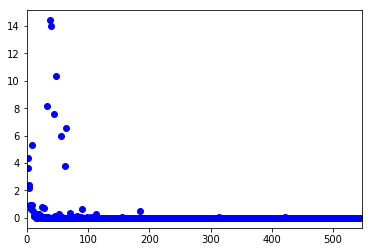

In [91]:

video_id = '3519744831' # APOCALYPSE: WWI
folder = 'od_'+ str(video_id)[1:10] +'_1fps'
od_dir = folder #Conversations with Dolphins
plot_class(od_dir, results, NUM_CLASSES,20,meanword=mean_word)



In [101]:
input_dir = '/root/root/ampvideo_inference/'
# input_dir = '/root/ampvideo_inference/'
video_id = '3481489902'
folder = 'od_'+ str(video_id)[1:10] +'_1fps'
folder_dir = os.path.join(input_dir, folder)
    
if os.path.exists(folder_dir):

        # read pickle
        print(folder)
        results[folder] = {}
        results[folder]['Words'] = calculate_words(read_frames_todict(folder_dir), NUM_CLASSES, maxF_dict)
#             results[folder]['Raw'] = read_frames_todict(folder_dir)
#             results[folder]['Words'] = calculate_words(results[folder]['Raw'], NUM_CLASSES, maxF_dict)



In [102]:
video_id = '3481489902' # APOCALYPSE: WWI
folder = 'od_'+ str(video_id)[1:10] +'_1fps'
od_dir = folder #Conversations with Dolphins
plot_class(od_dir, results, NUM_CLASSES,20,meanword=mean_word)

KeyError: 'od_481489902_1fps'

In [ ]:
# search all video, sort frequency

In [130]:
name_to_index

{u'Accordion': 311,
 u'Aircraft': 65,
 u'Airplane': 66,
 u'Alarm clock': 500,
 u'Alpaca': 396,
 u'Ambulance': 436,
 u'Animal': 13,
 u'Ant': 401,
 u'Antelope': 293,
 u'Apple': 265,
 u'Arm': 47,
 u'Artichoke': 501,
 u'Asparagus': 444,
 u'Auto part': 26,
 u'Backpack': 322,
 u'Bagel': 448,
 u'Baked goods': 61,
 u'Balance beam': 453,
 u'Ball': 89,
 u'Balloon': 134,
 u'Banana': 320,
 u'Banjo': 456,
 u'Barge': 406,
 u'Barrel': 334,
 u'Baseball bat': 273,
 u'Baseball glove': 201,
 u'Bat': 410,
 u'Bathroom accessory': 302,
 u'Bathroom cabinet': 394,
 u'Bathtub': 362,
 u'Bear': 233,
 u'Beard': 184,
 u'Bed': 140,
 u'Bee': 148,
 u'Beehive': 395,
 u'Beer': 84,
 u'Beetle': 166,
 u'Bell pepper': 402,
 u'Belt': 440,
 u'Bench': 535,
 u'Bicycle helmet': 110,
 u'Bicycle wheel': 59,
 u'Bidet': 357,
 u'Bike': 43,
 u'Billboard': 135,
 u'Billiard table': 341,
 u'Binoculars': 534,
 u'Bird': 27,
 u'Blender': 506,
 u'Blue jay': 469,
 u'Boat': 36,
 u'Book': 82,
 u'Bookcase': 136,
 u'Boot': 212,
 u'Bottle': 74,
 

In [180]:


def name_top_video(videoId_wordsFreq_per_class, name, name_to_index, result_to_showName, topN=5):
    target_index = name_to_index[name]-1
    print("{0},{1},{2},{3}".format('key' , 'class', 'Freq itself', 'show name'))
    for elem in videoId_wordsFreq_per_class[target_index][0:topN] :
        print("{0},{1},{2:0.1f},{3}".format(elem[0] , name, elem[1],result_to_showName[elem[0]]))



In [132]:
videoId_wordsFreq_per_class = [[] for x in range(NUM_CLASSES)]
for key, value in results.items():
    
    wordsFreqDict=results[key]['Words'].items()
    total_cnt = sum(results[key]['Words'].values())
    for elem in wordsFreqDict:
        videoId_wordsFreq_per_class[elem[0]-1].append((key ,elem[1]*100.0/total_cnt))





In [133]:
for videoId_wordsFreq in videoId_wordsFreq_per_class:
    videoId_wordsFreq.sort(key=lambda x: x[1], reverse=True)

In [134]:
videoId_wordsFreq_per_class[0]

[('od_562099834_1fps', 29.279057299592225),
 ('od_557507008_1fps', 27.016268751320517),
 ('od_578710484_1fps', 15.969891160614383),
 ('od_522779918_1fps', 14.659764423437617),
 ('od_546199865_1fps', 14.318338445738686),
 ('od_558280245_1fps', 13.83247695946497),
 ('od_552085607_1fps', 13.134471207529112),
 ('od_468133748_1fps', 12.83525764859158),
 ('od_560650996_1fps', 12.809973503634758),
 ('od_496549771_1fps', 12.161534890917531),
 ('od_546213140_1fps', 12.022802799016562),
 ('od_507738318_1fps', 12.002313699026319),
 ('od_496512113_1fps', 11.931818181818182),
 ('od_471679513_1fps', 11.897282473198704),
 ('od_471619495_1fps', 11.803588290840416),
 ('od_468065784_1fps', 11.767319733387195),
 ('od_558297733_1fps', 11.745471913001948),
 ('od_496411678_1fps', 11.692198851731925),
 ('od_482417283_1fps', 11.573896353166987),
 ('od_491839935_1fps', 11.568259918775382),
 ('od_465218659_1fps', 11.508128675198893),
 ('od_488715528_1fps', 11.336728842715958),
 ('od_563473181_1fps', 11.17023138

In [135]:
name_top_video(videoId_wordsFreq_per_class, 'Woman', name_to_index, result_to_showName, topN=5)

key,class,Freq itself,show name
od_481408161_1fps,Woman,7.69568526433,Girlfriends
od_585251739_1fps,Woman,7.50687442713,Bette
od_501005847_1fps,Woman,7.43633903309,Hot in Cleveland
od_537385070_1fps,Woman,7.41538238212,Absolutely Fabulous
od_484310907_1fps,Woman,7.40805604203,Garfunkel and Oates


ID,frequency (%),Name,% of All
8,53.90,Vehicle,394.12
45,13.17,Mammal,39.67
6,9.63,Plant,323.07
5,7.92,Tree,201.15
39,2.69,Head,5.32
41,1.93,Watercraft,859.72
9,1.73,Building,75.96
28,1.05,Sports equipment,36.02
50,1.01,Invertebrate,2268.65
13,0.86,Animal,93.27
32,0.85,Human body,2.25
1,0.57,Person,2.92
47,0.53,Arm,0.77
46,0.49,Skyscraper,249.09
20,0.47,House,106.07
36,0.35,Boat,176.43
27,0.30,Bird,227.46
263,0.30,Shellfish,13661.59
395,0.27,Beehive,5978.96
52,0.24,Poster,49.03
---sort by % among all videos---
263,0.296,Shellfish,13661.59
395,0.270,Beehive,5978.96
50,1.011,Invertebrate,2268.65
41,1.925,Watercraft,859.72
117,0.026,Reptile,431.80
251,0.044,Tank,396.21
8,53.903,Vehicle,394.12
422,0.026,Rays and skates,385.07
109,0.009,Duck,368.44
371,0.009,Kite,335.55
427,0.009,Honeycomb,326.66
6,9.627,Plant,323.07
285,0.017,Sea lion,286.01
46,0.488,Skyscraper,249.09
53,0.096,Insect,238.68
27,0.296,Bird,227.46
44,0.096,Tower,204.32
5,7.919,Tree,201.15
36,0.348,Boat,176.43
252,0.017,Squash

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars


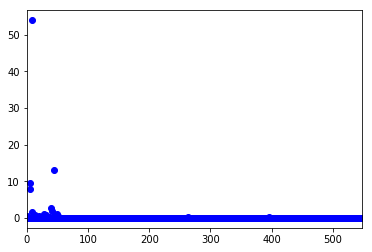

In [136]:
# video_id = '3481489902' # APOCALYPSE: WWI
# folder = 'od_'+ str(video_id)[1:10] +'_1fps'
od_dir = 'od_481523562_1fps' #Big Picture Earth (Music),  vehicle
plot_class(od_dir, results, NUM_CLASSES,20,meanword=mean_word)

In [137]:
category_index

{1: {'id': 1, 'name': u'Person'},
 2: {'id': 2, 'name': u'Clothing'},
 3: {'id': 3, 'name': u'Man'},
 4: {'id': 4, 'name': u'Face'},
 5: {'id': 5, 'name': u'Tree'},
 6: {'id': 6, 'name': u'Plant'},
 7: {'id': 7, 'name': u'Woman'},
 8: {'id': 8, 'name': u'Vehicle'},
 9: {'id': 9, 'name': u'Building'},
 10: {'id': 10, 'name': u'Land vehicle'},
 11: {'id': 11, 'name': u'Footwear'},
 12: {'id': 12, 'name': u'Girl'},
 13: {'id': 13, 'name': u'Animal'},
 14: {'id': 14, 'name': u'Car'},
 15: {'id': 15, 'name': u'Food'},
 16: {'id': 16, 'name': u'Wheel'},
 17: {'id': 17, 'name': u'Flower'},
 18: {'id': 18, 'name': u'Furniture'},
 19: {'id': 19, 'name': u'Window'},
 20: {'id': 20, 'name': u'House'},
 21: {'id': 21, 'name': u'Boy'},
 22: {'id': 22, 'name': u'Fashion accessory'},
 23: {'id': 23, 'name': u'Table'},
 24: {'id': 24, 'name': u'Glasses'},
 25: {'id': 25, 'name': u'Suit'},
 26: {'id': 26, 'name': u'Auto part'},
 27: {'id': 27, 'name': u'Bird'},
 28: {'id': 28, 'name': u'Sports equipmen

In [138]:
name_top_video(videoId_wordsFreq_per_class, 'Vehicle', name_to_index, result_to_showName, topN=5)

key,class,Freq itself,show name
od_481523562_1fps,Vehicle,53.9031190103,Big Picture Earth (Music)
od_481503732_1fps,Vehicle,53.9031190103,Big Picture Earth (Natural sound)
od_415034175_1fps,Vehicle,53.518480563,Aerial Cities
od_415036495_1fps,Vehicle,52.2936076605,Aerial Cities
od_415016945_1fps,Vehicle,52.0883865981,Aerial America


In [139]:
name_top_video(videoId_wordsFreq_per_class, 'Man', name_to_index, result_to_showName, topN=5)

key,class,Freq itself,show name
od_569673199_1fps,Man,10.1365379878,Fdr: The War Years: Host: Peter Graves
od_478385525_1fps,Man,8.20356649504,Hopalong Cassidy
od_552913711_1fps,Man,8.14307370078,Fantasy Football Today (Podcast)
od_463724452_1fps,Man,7.7978362878,Hopalong Cassidy
od_428358469_1fps,Man,7.51781404436,Gunsmoke


ID,frequency (%),Name,% of All
39,15.63,Head,152.89
3,10.14,Man,481.02
32,9.58,Human body,124.99
2,8.92,Clothing,199.89
37,8.25,Hair,65.75
45,8.22,Mammal,122.58
8,8.13,Vehicle,294.23
47,7.21,Arm,51.62
1,5.48,Person,139.97
4,3.01,Face,125.78
55,2.55,Nose,52.11
62,2.42,Eye,77.92
64,1.21,Mouth,38.46
10,0.91,Land vehicle,407.24
25,0.70,Suit,219.50
5,0.61,Tree,76.34
9,0.60,Building,129.39
28,0.48,Sports equipment,82.24
16,0.48,Wheel,470.61
23,0.47,Table,164.07
---sort by % among all videos---
525,0.005,Jacuzzi,3960.71
86,0.079,Drum,3645.36
182,0.091,Cart,2780.52
132,0.028,Tent,2543.94
291,0.011,Wheelchair,2294.48
517,0.005,Wine rack,2047.38
251,0.039,Tank,1743.34
93,0.016,Motorcycle,1386.25
34,0.450,Musical instrument,1195.71
518,0.004,Submarine,909.02
66,0.132,Airplane,824.25
171,0.035,Plumbing fixture,751.74
41,0.320,Watercraft,708.00
36,0.253,Boat,635.15
65,0.160,Aircraft,615.38
76,0.111,Horse,553.42
101,0.002,Rose,508.72
3,10.137,Man,481.02
38,0.104,Tire,472.65
434,0.007,Pitcher,472.42


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars


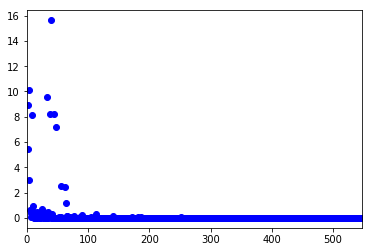

In [140]:
# video_id = '3481489902' # APOCALYPSE: WWI
# folder = 'od_'+ str(video_id)[1:10] +'_1fps'
od_dir = 'od_569673199_1fps' # Fdr: The War Years: Host: Peter Graves
plot_class(od_dir, results, NUM_CLASSES,20,meanword=mean_word)

In [237]:
name_top_video(videoId_wordsFreq_per_class, 'Weapon', name_to_index, result_to_showName, topN=10)

key,class,Freq itself,show name
od_482536276_1fps,Weapon,1.3,DARPA Robotics Challenge
od_474870599_1fps,Weapon,0.8,Curious Minds: Terrorism
od_576670997_1fps,Weapon,0.7,Drawn Together
od_486741043_1fps,Weapon,0.6,HBO Storybook Musicals
od_482394319_1fps,Weapon,0.5,DARPA Robotics Challenge
od_505014749_1fps,Weapon,0.5,Complete History Of The Green Berets, A
od_3448571952_1fps,Weapon,0.5,The Big Bang Theory
od_583233622_1fps,Weapon,0.5,Brexitcast
od_479737088_1fps,Weapon,0.4,Cosmic Front
od_440634714_1fps,Weapon,0.4,Casey Anderson's Wild Tracks


In [143]:
name_top_video(videoId_wordsFreq_per_class, 'Shotgun', name_to_index, result_to_showName, topN=5)

key,class,Freq itself,show name
od_497083817_1fps,Shotgun,0.144855558315,Cowboys & Outlaws
od_497093783_1fps,Shotgun,0.137475416722,Cowboys & Outlaws
od_474637533_1fps,Shotgun,0.0597728631201,Curious Minds: Terrorism
od_514996234_1fps,Shotgun,0.0577979000096,Blood and Glory: The Civil War in Color
od_529895131_1fps,Shotgun,0.0542754231016,Cajun Pawn Stars


In [236]:
name_top_video(videoId_wordsFreq_per_class, 'Dagger', name_to_index, result_to_showName, topN=5)

key,class,Freq itself,show name
od_415132870_1fps,Dagger,0.1,East Meets West
od_487720555_1fps,Dagger,0.1,Fantasmagorias
od_512599091_1fps,Dagger,0.1,Brad Meltzer's Lost History
od_562527363_1fps,Dagger,0.1,Good Morning Britain
od_472598698_1fps,Dagger,0.0,He-Man And The Masters Of The Universe


In [238]:
name_top_video(videoId_wordsFreq_per_class, 'Tank', name_to_index, result_to_showName, topN=5)

key,class,Freq itself,show name
od_519279183_1fps,Tank,0.5,D-Day: The Total Story - Breakout
od_509071984_1fps,Tank,0.5,Hell's Battlefield:: Kursk
od_519260532_1fps,Tank,0.3,Command Decisions
od_498190453_1fps,Tank,0.2,Declassified: Rise And Fall Of The Wall
od_506475787_1fps,Tank,0.2,Command Decisions


In [239]:
name_top_video(videoId_wordsFreq_per_class, 'Handgun', name_to_index, result_to_showName, topN=5)

key,class,Freq itself,show name
od_512578357_1fps,Handgun,0.1,Brad Meltzer's Lost History
od_529912665_1fps,Handgun,0.1,Cajun Pawn Stars
od_529895131_1fps,Handgun,0.1,Cajun Pawn Stars
od_512599091_1fps,Handgun,0.1,Brad Meltzer's Lost History
od_497093783_1fps,Handgun,0.0,Cowboys & Outlaws


In [241]:
name_top_video(videoId_wordsFreq_per_class, 'Missile', name_to_index, result_to_showName, topN=5)

key,class,Freq itself,show name
od_481552921_1fps,Missile,0.4,Destination: Moon
od_482329590_1fps,Missile,0.3,Destination: Pluto
od_508526559_1fps,Missile,0.2,Deadmen's Secrets
od_481709162_1fps,Missile,0.2,Curiosity Retreats 2014 Lectures
od_478864853_1fps,Missile,0.2,Holy War


In [148]:
# video_id = '3481489902' # APOCALYPSE: WWI
# folder = 'od_'+ str(video_id)[1:10] +'_1fps'
od_dir = 'od_497083817_1fps' # Cowboys & Outlaws
print_topN(od_dir, results,20,meanword=mean_word)

ID,frequency (%),Name,% of All
47,17.11,Arm,104.16
39,12.63,Head,105.01
45,11.93,Mammal,151.31
37,10.43,Hair,70.70
55,7.58,Nose,131.66
32,7.49,Human body,83.11
64,5.06,Mouth,137.14
1,4.48,Person,97.21
62,3.37,Eye,92.24
2,3.03,Clothing,57.82
5,2.91,Tree,310.68
8,1.93,Vehicle,59.31
3,1.87,Man,75.65
4,1.72,Face,61.09
6,1.55,Plant,219.57
70,0.78,Hand,202.70
13,0.70,Animal,320.31
28,0.66,Sports equipment,95.44
113,0.39,Ear,83.71
104,0.30,Weapon,1369.71
---sort by % among all videos---
387,0.021,Chopsticks,10081.82
405,0.145,Shotgun,8732.28
273,0.002,Baseball bat,6523.53
278,0.006,Cookie,3984.43
246,0.025,Cosmetics,3943.11
264,0.002,Sparrow,3214.49
534,0.006,Binoculars,2997.30
357,0.006,Bidet,2589.11
195,0.043,Rifle,2289.97
295,0.008,Toilet,1567.49
245,0.008,Coin,1406.02
104,0.302,Weapon,1369.71
369,0.008,Handgun,1280.23
457,0.002,Flute,1239.11
379,0.019,Mule,1209.09
328,0.014,Camel,1196.15
385,0.002,Raven,1131.63
344,0.006,Knife,1125.89
97,0.006,Moths and butterflies,1000.60
186,0.294,Cowbo

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars


In [149]:
name_top_video(videoId_wordsFreq_per_class, 'Food', name_to_index, result_to_showName, topN=5)

key,class,Freq itself,show name
od_457171310_1fps,Food,6.89091258898,Breakfast at Tastemade
od_440704471_1fps,Food,5.32967032967,Bug Bites
od_461494395_1fps,Food,4.01465668313,Behind The Dish
od_463818880_1fps,Food,3.12292098775,Frankie's World
od_575090688_1fps,Food,2.97539932377,Breakfast at Tastemade


In [150]:
name_top_video(videoId_wordsFreq_per_class, 'Animal', name_to_index, result_to_showName, topN=5)

key,class,Freq itself,show name
od_508040899_1fps,Animal,22.181372549,Doodle's House
od_485726067_1fps,Animal,21.8059558117,El Perro y El Gato
od_508049378_1fps,Animal,21.4067278287,Doodle's House
od_485152490_1fps,Animal,15.6812625028,El Perro y El Gato
od_485733090_1fps,Animal,15.613301035,El Perro y El Gato


In [151]:
name_top_video(videoId_wordsFreq_per_class, 'Mammal', name_to_index, result_to_showName, topN=5)

key,class,Freq itself,show name
od_3440947166_1fps,Mammal,41.1818968002,Africa's Hunters
od_478030495_1fps,Mammal,41.0475094182,Age Of Big Cats
od_3440414706_1fps,Mammal,39.6449366366,Africa's Hunters
od_3560135571_1fps,Mammal,39.427940236,Africa's Hunters
od_3438633737_1fps,Mammal,39.0218970248,Africa's Hunters


In [152]:
name_top_video(videoId_wordsFreq_per_class, 'Marine mammal', name_to_index, result_to_showName, topN=5)

key,class,Freq itself,show name
od_437692497_1fps,Marine mammal,6.84392223366,Arctic Secrets
od_440568278_1fps,Marine mammal,6.53522510902,Arabian Seas
od_508989499_1fps,Marine mammal,4.43864229765,I'm a Fish
od_478353516_1fps,Marine mammal,4.10013711354,Great Barrier Reef
od_464153858_1fps,Marine mammal,3.16579144786,David Attenborough's Great Barrier Reef


In [154]:
name_top_video(videoId_wordsFreq_per_class, 'Couch', name_to_index, result_to_showName, topN=10)

key,class,Freq itself,show name
od_3423611860_1fps,Couch,1.57967560919,The Big Bang Theory
od_554080401_1fps,Couch,1.50980153415,Hey Qween! Pride
od_3423587787_1fps,Couch,1.32329937006,The Big Bang Theory
od_558525597_1fps,Couch,1.31261379515,House of Payne
od_3487029989_1fps,Couch,1.26194210751,The Big Bang Theory
od_459046809_1fps,Couch,1.15815806541,Grandma's House
od_3423612893_1fps,Couch,1.05456054215,The Big Bang Theory
od_530224231_1fps,Couch,1.04245703164,For Richer or Poorer
od_563522323_1fps,Couch,1.02286793928,Design Twins
od_3423382124_1fps,Couch,1.02080422295,The Big Bang Theory


In [157]:
name_top_video(videoId_wordsFreq_per_class, 'Furniture', name_to_index, result_to_showName, topN=5)

key,class,Freq itself,show name
od_456981892_1fps,Furniture,3.62087326944,Hack Into Broad City
od_507383045_1fps,Furniture,3.60766629087,Baby Riki Feelings
od_529974779_1fps,Furniture,3.19273301738,Constitution Alive!
od_554080401_1fps,Furniture,2.93089353116,Hey Qween! Pride
od_405889768_1fps,Furniture,2.74533293401,Frasier


In [159]:
name_top_video(videoId_wordsFreq_per_class, 'Kitchen appliance', name_to_index, result_to_showName, topN=5)

key,class,Freq itself,show name
od_585231633_1fps,Kitchen appliance,5.21902806297,Bear Naked Chef
od_585189879_1fps,Kitchen appliance,4.38508064516,Bear Naked Chef
od_444406149_1fps,Kitchen appliance,3.51925094842,Christopher Kimball’s Milk Street Television
od_444007921_1fps,Kitchen appliance,1.86982332658,America's Test Kitchen
od_444119319_1fps,Kitchen appliance,1.51827830189,A Chef's Life


In [160]:
name_top_video(videoId_wordsFreq_per_class, 'Office supplies', name_to_index, result_to_showName, topN=5)

key,class,Freq itself,show name
od_507328577_1fps,Office supplies,0.836320191159,Baby Riki Feelings
od_498030191_1fps,Office supplies,0.384306014836,Greatest Party Story Ever
od_462920879_1fps,Office supplies,0.342966661623,Hard Medicine
od_560603162_1fps,Office supplies,0.292397660819,Black Books
od_507381848_1fps,Office supplies,0.281463610776,Baby Riki Nature


In [162]:
name_top_video(videoId_wordsFreq_per_class, 'Ball', name_to_index, result_to_showName, topN=5)

key,class,Freq itself,show name
od_475531888_1fps,Ball,0.944510035419,Curious Minds: The Universe
od_496399021_1fps,Ball,0.437331065691,Bella and the Bulldogs
od_507383045_1fps,Ball,0.338218714769,Baby Riki Feelings
od_482538417_1fps,Ball,0.269692830374,Curiosity Retreats 2015 Lectures
od_428358469_1fps,Ball,0.254281117113,Gunsmoke


In [163]:
name_top_video(videoId_wordsFreq_per_class, 'Helmet', name_to_index, result_to_showName, topN=5)

key,class,Freq itself,show name
od_542806049_1fps,Helmet,2.04653532609,Bob the Builder
od_484972457_1fps,Helmet,1.4961175388,Band of Brothers
od_476777289_1fps,Helmet,1.05755541997,How To Adventure
od_477153414_1fps,Helmet,0.960167316285,Alaska Extreme
od_486725982_1fps,Helmet,0.950421859703,Generation Kill


In [164]:
name_top_video(videoId_wordsFreq_per_class, 'Sports uniform', name_to_index, result_to_showName, topN=5)

key,class,Freq itself,show name
od_488577889_1fps,Sports uniform,2.23368932457,Hard Knocks: Training Camp with the Cleveland Browns
od_578110277_1fps,Sports uniform,1.0674363827,Hard Knocks: Training Camp with the Oakland Raiders
od_496414756_1fps,Sports uniform,1.00301501537,Bella and the Bulldogs
od_561511834_1fps,Sports uniform,0.992126438439,Hard Knocks: Training Camp with the Oakland Raiders
od_456351083_1fps,Sports uniform,0.920414186384,A Season With


In [166]:
name_top_video(videoId_wordsFreq_per_class, 'Football', name_to_index, result_to_showName, topN=5)

key,class,Freq itself,show name
od_464065302_1fps,Football,0.12261435121,Digimon Adventure
od_563011584_1fps,Football,0.119688809096,Canticos
od_481669447_1fps,Football,0.0749322727535,Innovation Nation
od_496399021_1fps,Football,0.0303702128952,Bella and the Bulldogs
od_496414756_1fps,Football,0.0238813098898,Bella and the Bulldogs


In [168]:
name_top_video(videoId_wordsFreq_per_class, 'Football helmet', name_to_index, result_to_showName, topN=10)

key,class,Freq itself,show name
od_488577889_1fps,Football helmet,1.16859036093,Hard Knocks: Training Camp with the Cleveland Browns
od_3491073807_1fps,Football helmet,0.634795286113,4th & Forever
od_3491110151_1fps,Football helmet,0.618477000387,4th & Forever
od_3491078546_1fps,Football helmet,0.617265543462,4th & Forever
od_3491087119_1fps,Football helmet,0.58082056352,4th & Forever
od_3491101611_1fps,Football helmet,0.561504709889,4th & Forever
od_488279509_1fps,Football helmet,0.526182240682,Hard Knocks: Training Camp with the Cleveland Browns
od_3491058050_1fps,Football helmet,0.477743448907,4th & Forever
od_578710484_1fps,Football helmet,0.447563828705,Fantasy Football Today
od_3491075244_1fps,Football helmet,0.442247658689,4th & Forever


In [169]:
name_top_video(videoId_wordsFreq_per_class, 'Cosmetics', name_to_index, result_to_showName, topN=10)

key,class,Freq itself,show name
od_507383045_1fps,Cosmetics,0.11273957159,Baby Riki Feelings
od_582906067_1fps,Cosmetics,0.110980948271,Bright Now
od_556172648_1fps,Cosmetics,0.0796158535068,Design Matters
od_480183436_1fps,Cosmetics,0.0732493407559,European Inventor Award 2018
od_483993060_1fps,Cosmetics,0.0625633081094,A Stitch in Time
od_558936645_1fps,Cosmetics,0.0453294479521,According To Alex
od_587374028_1fps,Cosmetics,0.0391747192478,Flour Power
od_518205813_1fps,Cosmetics,0.0375463462712,How to Look at a Painting
od_576946079_1fps,Cosmetics,0.0366606543194,BET+ Comedy Collection
od_489438734_1fps,Cosmetics,0.035843150374,Ancient Impossible


In [171]:
name_top_video(videoId_wordsFreq_per_class, 'Person', name_to_index, result_to_showName, topN=10)

key,class,Freq itself,show name
od_562099834_1fps,Person,29.2790572996,BIG3 Basketball
od_557507008_1fps,Person,27.0162687513,BIG3 Basketball
od_578710484_1fps,Person,15.9698911606,Fantasy Football Today
od_522779918_1fps,Person,14.6597644234,Cat In The Hat Knows A Lot About That!, The
od_546199865_1fps,Person,14.3183384457,Gaither Presents
od_558280245_1fps,Person,13.8324769595,Comic View
od_552085607_1fps,Person,13.1344712075,Foundations of Freedom
od_468133748_1fps,Person,12.8352576486,Doodlebops, The
od_560650996_1fps,Person,12.8099735036,Gay For Play
od_496549771_1fps,Person,12.1615348909,Ben & Holly's Little Kingdom


In [173]:
name_top_video(videoId_wordsFreq_per_class, 'Arm', name_to_index, result_to_showName, topN=10)

key,class,Freq itself,show name
od_507859127_1fps,Arm,55.4082055533,Box Yourself Minis
od_507838248_1fps,Arm,52.5943396226,Box Yourself Minis
od_462436748_1fps,Arm,45.3149975197,Comedy Underground Series
od_576946079_1fps,Arm,41.1669819483,BET+ Comedy Collection
od_495612000_1fps,Arm,40.668221963,Comedy Central Presents
od_576941500_1fps,Arm,40.6087832912,BET+ Comedy Collection
od_491542519_1fps,Arm,38.7393587195,HBO Comedy Half-Hour
od_482377115_1fps,Arm,36.8417408164,Curious Minds: Deepak Chopra
od_459006785_1fps,Arm,36.6188396756,Comedy Central Stand-Up Presents
od_491540437_1fps,Arm,36.4259815601,HBO Comedy Half-Hour


In [174]:
name_top_video(videoId_wordsFreq_per_class, 'Wheel', name_to_index, result_to_showName, topN=10)

key,class,Freq itself,show name
od_563024970_1fps,Wheel,16.7707505393,Blaze and The Monster Machine HD
od_566430402_1fps,Wheel,15.302304208,Blaze and the Monster Machines
od_566428348_1fps,Wheel,14.5054475539,Blaze and the Monster Machines
od_563029513_1fps,Wheel,13.1922043011,Blaze and The Monster Machine HD
od_507474020_1fps,Wheel,5.41516245487,Baby Riki Opposites
od_508636095_1fps,Wheel,4.11677031403,Car Country
od_512399062_1fps,Wheel,2.55094560915,Ice Road Truckers
od_497128028_1fps,Wheel,2.44233378562,Bubble Guppies
od_431029406_1fps,Wheel,2.3055028463,Incredible Flying Cars
od_447608681_1fps,Wheel,2.04905862089,Innovation Nation


In [182]:
name_top_video(videoId_wordsFreq_per_class, 'Vehicle', name_to_index, result_to_showName, topN=10)

key,class,Freq itself,show name
od_481523562_1fps,Vehicle,53.9,Big Picture Earth (Music)
od_481503732_1fps,Vehicle,53.9,Big Picture Earth (Natural sound)
od_415034175_1fps,Vehicle,53.5,Aerial Cities
od_415036495_1fps,Vehicle,52.3,Aerial Cities
od_415016945_1fps,Vehicle,52.1,Aerial America
od_414989689_1fps,Vehicle,50.7,Aerial Africa
od_437663508_1fps,Vehicle,47.6,Arctic Secrets
od_475779537_1fps,Vehicle,43.5,Curious Minds: Oceans
od_505666835_1fps,Vehicle,42.5,Great Spy Stories
od_415037435_1fps,Vehicle,41.6,Aerial America


In [248]:
name_top_video(videoId_wordsFreq_per_class, 'Land vehicle', name_to_index, result_to_showName, topN=10)

key,class,Freq itself,show name
od_566430402_1fps,Land vehicle,15.1,Blaze and the Monster Machines
od_563024970_1fps,Land vehicle,12.5,Blaze and The Monster Machine HD
od_563029513_1fps,Land vehicle,11.1,Blaze and The Monster Machine HD
od_566428348_1fps,Land vehicle,11.1,Blaze and the Monster Machines
od_512399062_1fps,Land vehicle,6.9,Ice Road Truckers
od_512493691_1fps,Land vehicle,5.4,Ice Road Truckers
od_474589688_1fps,Land vehicle,5.4,Curious Minds: Nanotechnology
od_477621887_1fps,Land vehicle,4.4,Heston's Dinner In Space
od_476140749_1fps,Land vehicle,4.2,Curious Minds: Robotics
od_508636095_1fps,Land vehicle,4.2,Car Country


In [247]:
name_top_video(videoId_wordsFreq_per_class, 'Wheel', name_to_index, result_to_showName, topN=10)

key,class,Freq itself,show name
od_563024970_1fps,Wheel,16.8,Blaze and The Monster Machine HD
od_566430402_1fps,Wheel,15.3,Blaze and the Monster Machines
od_566428348_1fps,Wheel,14.5,Blaze and the Monster Machines
od_563029513_1fps,Wheel,13.2,Blaze and The Monster Machine HD
od_507474020_1fps,Wheel,5.4,Baby Riki Opposites
od_508636095_1fps,Wheel,4.1,Car Country
od_512399062_1fps,Wheel,2.6,Ice Road Truckers
od_497128028_1fps,Wheel,2.4,Bubble Guppies
od_431029406_1fps,Wheel,2.3,Incredible Flying Cars
od_447608681_1fps,Wheel,2.0,Innovation Nation


In [249]:
name_top_video(videoId_wordsFreq_per_class, 'Car', name_to_index, result_to_showName, topN=10)

key,class,Freq itself,show name
od_508636095_1fps,Car,5.2,Car Country
od_497388085_1fps,Car,2.7,Carpool Karaoke
od_574777449_1fps,Car,1.9,All Aboard!
od_494588237_1fps,Car,1.5,Barry
od_431029406_1fps,Car,1.5,Incredible Flying Cars
od_588898701_1fps,Car,1.3,Dead Good Job
od_479738125_1fps,Car,1.1,Beating Death: The Science of Survival
od_465243185_1fps,Car,1.1,Infiltrados
od_531899698_1fps,Car,1.1,Ambulance Australia
od_478808588_1fps,Car,1.0,Cities Of Tomorrow


In [250]:
name_top_video(videoId_wordsFreq_per_class, 'Boat', name_to_index, result_to_showName, topN=10)

key,class,Freq itself,show name
od_475779537_1fps,Boat,4.1,Curious Minds: Oceans
od_518531059_1fps,Boat,2.8,Combat Ships
od_505666835_1fps,Boat,2.7,Great Spy Stories
od_437663508_1fps,Boat,2.4,Arctic Secrets
od_447209067_1fps,Boat,2.3,Humongous Moves
od_496029809_1fps,Boat,1.9,Fireman Sam
od_512441658_1fps,Boat,1.9,Battle 360
od_518488374_1fps,Boat,1.7,Combat Ships
od_489403796_1fps,Boat,1.6,Ancient Impossible
od_579518842_1fps,Boat,1.5,Coast


In [231]:
name_top_video(videoId_wordsFreq_per_class, 'Musical instrument', name_to_index, result_to_showName, topN=10)

key,class,Freq itself,show name
od_482417283_1fps,Musical instrument,4.9,Charles Yang Performances
od_478414905_1fps,Musical instrument,4.3,Curious Minds: Music
od_546199865_1fps,Musical instrument,3.2,Gaither Presents
od_478381202_1fps,Musical instrument,2.3,Curious Minds: Music
od_482441337_1fps,Musical instrument,1.9,Charles Yang Performances
od_468065784_1fps,Musical instrument,1.4,Doodlebops, The
od_476177594_1fps,Musical instrument,1.2,Curious Minds:  Shakespeare
od_468133748_1fps,Musical instrument,1.0,Doodlebops, The
od_558297733_1fps,Musical instrument,1.0,Comic View
od_558280245_1fps,Musical instrument,0.9,Comic View


In [234]:
name_top_video(videoId_wordsFreq_per_class, 'Bird', name_to_index, result_to_showName, topN=10)

key,class,Freq itself,show name
od_439322871_1fps,Bird,6.7,Brazil Untamed
od_440568278_1fps,Bird,6.4,Arabian Seas
od_485726067_1fps,Bird,6.2,El Perro y El Gato
od_475775000_1fps,Bird,5.7,Curious Minds: Animals
od_506126344_1fps,Bird,5.6,African & West Indian Nursery Rhymes
od_433307747_1fps,Bird,5.3,Coastal Africa
od_437692497_1fps,Bird,4.0,Arctic Secrets
od_485720006_1fps,Bird,3.5,El Perro y El Gato
od_482295459_1fps,Bird,3.5,Brazil - A Natural History
od_485733090_1fps,Bird,3.4,El Perro y El Gato


In [235]:
name_top_video(videoId_wordsFreq_per_class, 'Fish', name_to_index, result_to_showName, topN=10)

key,class,Freq itself,show name
od_440568278_1fps,Fish,22.8,Arabian Seas
od_478343214_1fps,Fish,12.9,Great Barrier Reef
od_508989499_1fps,Fish,10.7,I'm a Fish
od_431566804_1fps,Fish,9.0,Great Blue Wild
od_431694183_1fps,Fish,8.6,Great Blue Wild
od_475033522_1fps,Fish,7.5,Curious Minds: Marine Conservation
od_478353516_1fps,Fish,3.7,Great Barrier Reef
od_476381356_1fps,Fish,3.7,Curious Minds: Science In Society
od_440638297_1fps,Fish,3.5,Arabian Seas
od_464502721_1fps,Fish,3.1,David Attenborough's Great Barrier Reef


In [ ]:
name_top_video(videoId_wordsFreq_per_class, 'Car', name_to_index, result_to_showName, topN=10)

In [223]:
def print_topN(od_dir, results, topN=5,meanword=[],features=[],result_to_showName={}, mixfeatures={}):
    wordsFreqDict=results[od_dir]['Words'].copy
    category_index_ = category_index.copy    
    # Create a list of tuples sorted by index 1 i.e. value field     
    listofTuples = sorted(wordsFreqDict.items() ,  key=lambda x: x[1], reverse=True)
    # Iterate over the sorted sequence
    total_cnt = sum(wordsFreqDict.values())
#     print('ID', 'frequency', 'Name' )
    if features:
        topN = None
    if result_to_showName:
        print('{},{}'.format(od_dir, result_to_showName[od_dir]))
    else:
        print('{}'.format(od_dir))
    if len(meanword)>0:
        print("{0},{1},{2},{3},{4}".format('ID','Name', 'Counts (#)','Counts (%)','Relative to class (%) ' ))
        for elem in listofTuples[0:topN] :
            if features and category_index[elem[0]]['name'] not in features:
                continue
            print("{0},{1},{2},{3:0.2f},{4:0.2f}".format(elem[0], category_index_[elem[0]]['name'], elem[1], elem[1]*100.0/total_cnt,elem[1]*100.0/meanword[elem[0]-1]))
        wordsOverallFreqDict = []
        for elem in wordsFreqDict.items():
            wordsOverallFreqDict.append((elem[0],elem[1]*100.0/meanword[elem[0]-1]))
            
        listofoverallTuples = sorted(wordsOverallFreqDict ,  key=lambda x: x[1], reverse=True)
        print("---sort by % among all videos---")
        for elem in listofoverallTuples[0:topN] :
            if features and category_index[elem[0]]['name'] not in features:
                continue
            print("{0},{1:0.3f},{2},{3:0.2f}".format(elem[0] , elem[1]*meanword[elem[0]-1]/total_cnt, category_index_[elem[0]]['name'],elem[1]))
      

    else:
        print("{0},{1},{2}".format('ID', 'frequency (%)', 'Name' ))
        for elem in listofTuples[0:topN] :
            if features and category_index[elem[0]]['name'] not in features:
                continue
    #         print(elem[0] , elem[1]*100.0/total_cnt, category_index[elem[0]]['name'] )
            print("{0},{1:0.2f},{2}".format(elem[0] , elem[1]*100.0/total_cnt, category_index_[elem[0]]['name']))

In [252]:
# wordsDict = {1:34}
# newDict = wordsDict.copy()
# newDict[3] = 44
# print(wordsDict, newDict)

{1: 34} {1: 34, 3: 44}


In [224]:
od_dir = 'od_488577889_1fps' 
print_topN(od_dir, results,20,meanword=mean_word,result_to_showName=result_to_showName, features=['Football helmet', 'Person', 'Food', 'Woman', 'Mammal', 'Marine mammal', 'Couch', 'Furniture', 'Kitchen appliance', 'Sports uniform', 'Football helmet'])

od_488577889_1fps,Hard Knocks: Training Camp with the Cleveland Browns
ID,Name,Counts (#),Counts (%),Relative to class (%) 
45,Mammal,8624,12.40,226.27
1,Person,6547,9.41,294.10
96,Sports uniform,1554,2.23,18697.91
180,Football helmet,813,1.17,36688.38
7,Woman,336,0.48,34.19
18,Furniture,218,0.31,145.61
103,Couch,38,0.05,107.96
15,Food,1,0.00,3.11
151,Marine mammal,0,0.00,0.00
172,Kitchen appliance,0,0.00,0.00
---sort by % among all videos---
180,1.169,Football helmet,36688.38
96,2.234,Sports uniform,18697.91
1,9.411,Person,294.10
45,12.396,Mammal,226.27
18,0.313,Furniture,145.61
103,0.055,Couch,107.96
7,0.483,Woman,34.19
15,0.001,Food,3.11
151,0.000,Marine mammal,0.00
172,0.000,Kitchen appliance,0.00


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


In [222]:
od_dir = 'od_3440947166_1fps' 
print_topN(od_dir, results,20,meanword=mean_word,result_to_showName=result_to_showName, features=['Football helmet', 'Person', 'Food', 'Woman', 'Mammal', 'Marine mammal', 'Couch', 'Furniture', 'Kitchen appliance', 'Sports uniform', 'Football helmet'])

od_3440947166_1fps,Africa's Hunters
ID,Name,Counts (#),Counts (%),Relative to class(%) 
45,Mammal,7143,41.18,187.41
151,Marine mammal,88,0.51,931.58
1,Person,10,0.06,0.45
15,Food,1,0.01,3.11
7,Woman,0,0.00,0.00
18,Furniture,0,0.00,0.00
96,Sports uniform,0,0.00,0.00
103,Couch,0,0.00,0.00
172,Kitchen appliance,0,0.00,0.00
180,Football helmet,0,0.00,0.00
---sort by % among all videos---
151,0.507,Marine mammal,931.58
45,41.182,Mammal,187.41
15,0.006,Food,3.11
1,0.058,Person,0.45
7,0.000,Woman,0.00
18,0.000,Furniture,0.00
96,0.000,Sports uniform,0.00
103,0.000,Couch,0.00
172,0.000,Kitchen appliance,0.00
180,0.000,Football helmet,0.00


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


In [225]:
od_dir = 'od_437692497_1fps' 
print_topN(od_dir, results,20,meanword=mean_word,result_to_showName=result_to_showName, features=['Football helmet', 'Person', 'Food', 'Woman', 'Mammal', 'Marine mammal', 'Couch', 'Furniture', 'Kitchen appliance', 'Sports uniform', 'Football helmet'])

od_437692497_1fps,Arctic Secrets
ID,Name,Counts (#),Counts (%),Relative to class (%) 
45,Mammal,3785,22.92,99.31
151,Marine mammal,1130,6.84,11962.29
1,Person,20,0.12,0.90
15,Food,1,0.01,3.11
7,Woman,0,0.00,0.00
18,Furniture,0,0.00,0.00
96,Sports uniform,0,0.00,0.00
103,Couch,0,0.00,0.00
172,Kitchen appliance,0,0.00,0.00
180,Football helmet,0,0.00,0.00
---sort by % among all videos---
151,6.844,Marine mammal,11962.29
45,22.924,Mammal,99.31
15,0.006,Food,3.11
1,0.121,Person,0.90
7,0.000,Woman,0.00
18,0.000,Furniture,0.00
96,0.000,Sports uniform,0.00
103,0.000,Couch,0.00
172,0.000,Kitchen appliance,0.00
180,0.000,Football helmet,0.00


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


In [226]:
od_dir = 'od_481408161_1fps' 
print_topN(od_dir, results,20,meanword=mean_word,result_to_showName=result_to_showName, features=['Football helmet', 'Person', 'Food', 'Woman', 'Mammal', 'Marine mammal', 'Couch', 'Furniture', 'Kitchen appliance', 'Sports uniform', 'Football helmet'])

od_481408161_1fps,Girlfriends
ID,Name,Counts (#),Counts (%),Relative to class (%) 
7,Woman,2629,7.70,267.55
45,Mammal,1423,4.17,37.34
1,Person,1147,3.36,51.52
18,Furniture,201,0.59,134.25
103,Couch,98,0.29,278.43
15,Food,69,0.20,214.70
172,Kitchen appliance,21,0.06,275.95
96,Sports uniform,0,0.00,0.00
151,Marine mammal,0,0.00,0.00
180,Football helmet,0,0.00,0.00
---sort by % among all videos---
103,0.287,Couch,278.43
172,0.061,Kitchen appliance,275.95
7,7.696,Woman,267.55
15,0.202,Food,214.70
18,0.588,Furniture,134.25
1,3.358,Person,51.52
45,4.165,Mammal,37.34
96,0.000,Sports uniform,0.00
151,0.000,Marine mammal,0.00
180,0.000,Football helmet,0.00


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


In [227]:
od_dir = 'od_3423611860_1fps' 
print_topN(od_dir, results,20,meanword=mean_word,result_to_showName=result_to_showName, features=['Football helmet', 'Person', 'Food', 'Woman', 'Mammal', 'Marine mammal', 'Couch', 'Furniture', 'Kitchen appliance', 'Sports uniform', 'Football helmet'])

od_3423611860_1fps,The Big Bang Theory
ID,Name,Counts (#),Counts (%),Relative to class (%) 
45,Mammal,1390,5.34,36.47
1,Person,1374,5.28,61.72
7,Woman,983,3.78,100.04
18,Furniture,525,2.02,350.66
103,Couch,411,1.58,1167.71
15,Food,63,0.24,196.03
151,Marine mammal,1,0.00,10.59
172,Kitchen appliance,1,0.00,13.14
96,Sports uniform,0,0.00,0.00
180,Football helmet,0,0.00,0.00
---sort by % among all videos---
103,1.580,Couch,1167.71
18,2.018,Furniture,350.66
15,0.242,Food,196.03
7,3.778,Woman,100.04
1,5.281,Person,61.72
45,5.342,Mammal,36.47
172,0.004,Kitchen appliance,13.14
151,0.004,Marine mammal,10.59
96,0.000,Sports uniform,0.00
180,0.000,Football helmet,0.00


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


In [228]:
od_dir = 'od_585231633_1fps' 
print_topN(od_dir, results,20,meanword=mean_word,result_to_showName=result_to_showName, features=['Football helmet', 'Person', 'Food', 'Woman', 'Mammal', 'Marine mammal', 'Couch', 'Furniture', 'Kitchen appliance', 'Sports uniform', 'Football helmet'])

od_585231633_1fps,Bear Naked Chef
ID,Name,Counts (#),Counts (%),Relative to class (%) 
172,Kitchen appliance,610,5.22,8015.76
1,Person,590,5.05,26.50
45,Mammal,242,2.07,6.35
15,Food,236,2.02,734.34
18,Furniture,188,1.61,125.57
7,Woman,1,0.01,0.10
96,Sports uniform,0,0.00,0.00
103,Couch,0,0.00,0.00
151,Marine mammal,0,0.00,0.00
180,Football helmet,0,0.00,0.00
---sort by % among all videos---
172,5.219,Kitchen appliance,8015.76
15,2.019,Food,734.34
18,1.608,Furniture,125.57
1,5.048,Person,26.50
45,2.070,Mammal,6.35
7,0.009,Woman,0.10
96,0.000,Sports uniform,0.00
103,0.000,Couch,0.00
151,0.000,Marine mammal,0.00
180,0.000,Football helmet,0.00


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


In [229]:
od_dir = 'od_457171310_1fps' 
print_topN(od_dir, results,20,meanword=mean_word,result_to_showName=result_to_showName, features=['Football helmet', 'Person', 'Food', 'Woman', 'Mammal', 'Marine mammal', 'Couch', 'Furniture', 'Kitchen appliance', 'Sports uniform', 'Football helmet'])

od_457171310_1fps,Breakfast at Tastemade
ID,Name,Counts (#),Counts (%),Relative to class (%) 
15,Food,2149,6.89,6686.89
1,Person,1475,4.73,66.26
45,Mammal,693,2.22,18.18
7,Woman,464,1.49,47.22
172,Kitchen appliance,228,0.73,2996.05
18,Furniture,68,0.22,45.42
96,Sports uniform,17,0.05,204.55
103,Couch,0,0.00,0.00
151,Marine mammal,0,0.00,0.00
180,Football helmet,0,0.00,0.00
---sort by % among all videos---
15,6.891,Food,6686.89
172,0.731,Kitchen appliance,2996.05
96,0.055,Sports uniform,204.55
1,4.730,Person,66.26
7,1.488,Woman,47.22
18,0.218,Furniture,45.42
45,2.222,Mammal,18.18
103,0.000,Couch,0.00
151,0.000,Marine mammal,0.00
180,0.000,Football helmet,0.00


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


In [230]:
od_dir = 'od_488577889_1fps' 
print_topN(od_dir, results,20,meanword=mean_word,result_to_showName=result_to_showName, features=['Football helmet', 'Person', 'Food', 'Woman', 'Mammal', 'Marine mammal', 'Couch', 'Furniture', 'Kitchen appliance', 'Sports uniform', 'Football helmet'])

od_488577889_1fps,Hard Knocks: Training Camp with the Cleveland Browns
ID,Name,Counts (#),Counts (%),Relative to class (%) 
45,Mammal,8624,12.40,226.27
1,Person,6547,9.41,294.10
96,Sports uniform,1554,2.23,18697.91
180,Football helmet,813,1.17,36688.38
7,Woman,336,0.48,34.19
18,Furniture,218,0.31,145.61
103,Couch,38,0.05,107.96
15,Food,1,0.00,3.11
151,Marine mammal,0,0.00,0.00
172,Kitchen appliance,0,0.00,0.00
---sort by % among all videos---
180,1.169,Football helmet,36688.38
96,2.234,Sports uniform,18697.91
1,9.411,Person,294.10
45,12.396,Mammal,226.27
18,0.313,Furniture,145.61
103,0.055,Couch,107.96
7,0.483,Woman,34.19
15,0.001,Food,3.11
151,0.000,Marine mammal,0.00
172,0.000,Kitchen appliance,0.00


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


In [298]:
def print_topN(od_dir, results, topN=5,meanword=[],features=[],result_to_showName={}, mixfeatures={}):
    wordsFreqDict=results[od_dir]['Words'].copy()
    category_index_ = category_index.copy()
    meanword_ = meanword.copy()
    # Combine Class, create New one
    if mixfeatures:
        num_class = len(category_index_.keys())
        for new_class, combine_class_list in mixfeatures.items():
            num_class += 1
            category_index_[num_class] = {'name':new_class}
            wordsFreqDict[num_class] = 0
            meanword_ = np.append(meanword_, [0])
            for combine_class in combine_class_list:
                wordsFreqDict[num_class] += wordsFreqDict[name_to_index[combine_class]]
                meanword_[-1] += meanword_[name_to_index[combine_class]-1]
#             meanword_[-1] /= len(combine_class_list)

    # Create a list of tuples sorted by index 1 i.e. value field     
    listofTuples = sorted(wordsFreqDict.items() ,  key=lambda x: x[1], reverse=True)
    # Iterate over the sorted sequence
    total_cnt = sum(wordsFreqDict.values())
#     print('ID', 'frequency', 'Name' )
    if features:
        topN = None
    if result_to_showName:
        print('{},{}'.format(od_dir, result_to_showName[od_dir]))
    else:
        print('{}'.format(od_dir))
    if len(meanword)>0:
        print("{0},{1},{2},{3},{4}".format('ID','Name', 'Counts (#)','Counts (%)','Relative to class (%) ' ))
        for elem in listofTuples[0:topN] :
            if features and category_index_[elem[0]]['name'] not in features:
                continue
            print("{0},{1},{2},{3:0.2f},{4:0.2f}".format(elem[0], category_index_[elem[0]]['name'], elem[1], elem[1]*100.0/total_cnt,elem[1]*100.0/meanword_[elem[0]-1]))
        wordsOverallFreqDict = []
        for elem in wordsFreqDict.items():
            wordsOverallFreqDict.append((elem[0],elem[1]*100.0/meanword_[elem[0]-1]))
            
        listofoverallTuples = sorted(wordsOverallFreqDict ,  key=lambda x: x[1], reverse=True)
        print("---sort by % among all videos---")
        for elem in listofoverallTuples[0:topN] :
            if features and category_index_[elem[0]]['name'] not in features:
                continue
            print("{0},{1:0.3f},{2},{3:0.2f}".format(elem[0] , elem[1]*meanword_[elem[0]-1]/total_cnt, category_index_[elem[0]]['name'],elem[1]))
      

    else:
        print("{0},{1},{2}".format('ID', 'frequency (%)', 'Name' ))
        for elem in listofTuples[0:topN] :
            if features and category_index_[elem[0]]['name'] not in features:
                continue
    #         print(elem[0] , elem[1]*100.0/total_cnt, category_index[elem[0]]['name'] )
            print("{0},{1:0.2f},{2}".format(elem[0] , elem[1]*100.0/total_cnt, category_index_[elem[0]]['name']))

In [336]:
name_top_video(videoId_wordsFreq_per_class, 'Bird', name_to_index, result_to_showName, topN=10)

key,class,Freq itself,show name
od_439322871_1fps,Bird,6.7,Brazil Untamed
od_440568278_1fps,Bird,6.4,Arabian Seas
od_485726067_1fps,Bird,6.2,El Perro y El Gato
od_475775000_1fps,Bird,5.7,Curious Minds: Animals
od_506126344_1fps,Bird,5.6,African & West Indian Nursery Rhymes
od_433307747_1fps,Bird,5.3,Coastal Africa
od_437692497_1fps,Bird,4.0,Arctic Secrets
od_485720006_1fps,Bird,3.5,El Perro y El Gato
od_482295459_1fps,Bird,3.5,Brazil - A Natural History
od_485733090_1fps,Bird,3.4,El Perro y El Gato


In [350]:
od_dir = 'od_437692497_1fps' 
print_topN(od_dir, results,20,meanword=mean_word,result_to_showName=result_to_showName, features=['Marine life_','Musical instrument','Bird','Vehicle_','Weapon_','Sport_','Furniture_', 'Person', 'Food', 'Woman', 'Mammal',  'Kitchen appliance'], mixfeatures = {'Marine life_':['Fish', 'Marine mammal'],'Vehicle_':['Car', 'Wheel', 'Bus'],'Weapon_':['Tank', 'Handgun', 'Shotgun', 'Missile'],'Sport_':['Sports uniform', 'Football helmet'],'Furniture_': ['Furniture', 'Couch']})

od_437692497_1fps,Arctic Secrets
ID,Name,Counts (#),Counts (%),Relative to class (%) 
45,Mammal,3785,21.12,99.31
549,Marine life_,1412,7.88,6438.90
27,Bird,658,3.67,4402.01
1,Person,20,0.11,0.90
550,Weapon_,2,0.01,55.74
15,Food,1,0.01,3.11
7,Woman,0,0.00,0.00
34,Musical instrument,0,0.00,0.00
172,Kitchen appliance,0,0.00,0.00
548,Furniture_,0,0.00,0.00
551,Sport_,0,0.00,0.00
552,Vehicle_,0,0.00,0.00
---sort by % among all videos---
549,7.877,Marine life_,6438.90
27,3.671,Bird,4402.01
45,21.116,Mammal,99.31
550,0.011,Weapon_,55.74
15,0.006,Food,3.11
1,0.112,Person,0.90
7,0.000,Woman,0.00
34,0.000,Musical instrument,0.00
172,0.000,Kitchen appliance,0.00
548,0.000,Furniture_,0.00
551,0.000,Sport_,0.00
552,0.000,Vehicle_,0.00


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
